# Calculating and cooking the "Lobster plot"
**Author:** Jorge Torres, modified and updated from Jeremy Cushman's previous notebook: https://github.mit.edu/jeremy-cushman-1/neutrinomass

**Description:** This notebook explains how to generate the so-called "Lobster plot".

# Theory

### The effective Majorana mass ($m_{\beta\beta}$): 
The effective Majorana mass is defined as: 
$$
|m_{\beta\beta}| = \left|\sum_i^3 U^2_{ei} m_i\right|,
$$
where $U$ is the PMNS matrix with two Majorana phases, where the mixing matrix elements are: 
* $U_{e1} = \cos(\theta_{12})\cos(\theta_{13})$, 
* $U_{e2} = \sin(\theta_{12})\cos(\theta_{13})e^{i\alpha}$,
* $U_{e3} = \sin(\theta_{13})e^{i(\beta-\eta)}$

$\alpha$, $\beta$ are two Majorana mixing angles for which experimental information is not available, $\eta$ is the CP-violating angle. In the calculation, $\beta-\eta$ is one random number from 0 to 2$\pi$.

One can expand the previous expression for $|m_{\beta\beta}|$ to obtain the following:

$$
|m_{\beta\beta}| = |c_{12}^2c_{13}^2m_1 + s_{12}^2c_{13}^2e^{i\alpha} m_2 + s_{13}^2 e^{i(\beta-\eta)}m_3|,
$$
where I have defined $c_{ab} \equiv \cos(\theta_{ab})$ and $s_{ab} \equiv \sin(\theta_{ab})$. The neutrino masses $m_i$ are realted to squared masses differences from solar and atmospheric data, $\Delta m^2_{\text{solar}}$ and $\Delta m^2_{\text{atm}}$ respectively. These can be approximated as a combination of the different $\Delta m^2_{ij}$ as follows:

$$
\Delta m^2_{\text{solar}} \approx \Delta m^2_{21} \qquad \Delta m^2_{\text{atm}} \approx \frac{1}{2}\left|\Delta m^2_{31} + \Delta m^2_{32}\right|
$$

We have measured the value of and sign of $\Delta m^2_{\text{solar}}$ (positive). We have measured the value of $\Delta m^2_{\text{atm}}$, but not its sign. From this and from the previous relation between mass eigenstates, there can be two different schemes. The first scheme where $m_1$ is the lightest neutrino, called Normal Hierarchy (NH):
$$
m_1 = m_{\text{lightest}}
$$
$$
m_2 = \sqrt{m_{\text{lightest}}+\Delta m^2_{\text{solar}}}
$$
$$
m_3 = \sqrt{m_{\text{lightest}}+\Delta m^2_{\text{atm}}+\frac{\Delta m^2_{\text{solar}}}{2}}
$$

The second scheme corresponds to $m_3$ being the lightest neutrino mass eigenstate, named Inverted Hierarchy (IH):
$$
m_1 = \sqrt{m_{\text{lightest}}+\Delta m^2_{\text{atm}}-\frac{\Delta m^2_{\text{solar}}}{2}}
$$
$$
m_2 = \sqrt{m_{\text{lightest}}+\Delta m^2_{\text{atm}}+\frac{\Delta m^2_{\text{solar}}}{2}}
$$
$$
m_3 = m_{\text{lightest}}
$$

From this, we can obtain an expression for the effective majorana mass ($m_{\beta\beta}$) in terms of measured parameters and as a function of the lightest mass eigenstate ($m_{\text{lightest}}$) for the two different scenarios.


The values of the parameters used in this code are shown next.


## Mixing Parameters from NuFIT 5.0 [[JHEP 09 (2020) 178]](https://link.springer.com/article/10.1007%2FJHEP09%282020%29178)

<img src="NuFIT5.0.png" alt="Drawing" style="width: 600px;"/>

We use the parameters that include SK atmospheric data.


<!-- ### Kinetic neutrino mass from beta decay: 
$m_\beta^2 = \Sigma_i|U_{ei}|^2 M^2_i $

## If we include sterile neutrinos
* $U_{e4} = sin(\theta_{14})e^{i\gamma}$

$\gamma$ is an additinal Majorana mixing angle.

The mixing parameters for the 3+1 model is taken from Kopp, et al (http://arxiv.org/abs/1303.3011). We should keep in mind:
* No 3$\sigma$ fit parameters were given in the reference. Only best-fit values are used for this calculation.
* The added sterile flavor has little impact on mixing parameters of the standard 3 flavor values. I keep using the PDG2014 values with the ad hoc sterile part (partly to avoid adding yet another set of numbers)

<img src='Sterile_MixingParameters.pdf', style='width:90%; border:1px solid black;'> -->



# Code implementation

The function that performs the scan as a function of $m_{\text{lightest}}$ is implemented in $\texttt{numass.py}$, and is called $\texttt{nuM_range}$. What it does, roughly, is to sample the majorana phases from a beta distribution centered at 0.5 (you can think of this as "we don't know the majorana phases value, but we expect them to be around 0.5 in average") for all the possible values of $m_{\text{lightest}}$.

I have implemented $\texttt{getArrays.py}$, which does the sampling for either IH or NH (decoupled, for a faster calculation), and it takes about 30 min to run over 50k samples. It produces two files: $\texttt{normalArray.npy}$ and $\texttt{invertedArray.npy}$, which contain the sampled values as well as the $\pm 3\sigma$ limits. Those files can be loaded as explained below, and be used to make the so-called "Lobster plot".

## Import needed libraries

In [1]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

In [2]:
from numass import nuM_range, AddExperimentalLimits, massContour, addSensitivity # import functions from the numass.py file

## The following lines I use to make plots look more LaTex-esque

In [3]:
import matplotlib as mpl
import seaborn as sns

mpl.rcParams['text.usetex'] = True
mpl.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams['mathtext.it'] = 'Times New Roman:italic'
mpl.rcParams['mathtext.bf'] = 'Times New Roman:bold'
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command

mpl.rc('font', family='serif', size=12)
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['ytick.major.size'] = 5

mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
# mpl.rc('font', size=16)
mpl.rc('axes', titlesize=20)

current_palette = sns.color_palette('colorblind', 10)

/tmp/ipykernel_30750/4047387554.py:8: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command


## Here's where we load the produced files and define the plot limts

In [4]:
ml = np.linspace(0.01,1,100)
ml = np.append(ml, np.linspace(1.1,10,90))
ml = np.append(ml, np.linspace(11,100,90))
ml = np.append(ml, np.linspace(110,1000,90))

with open('normalArray.npy', 'rb') as f:
    mbbN = np.load(f)
    mbN = np.load(f)
    sumMN = np.load(f)
    
with open('invertedArray.npy', 'rb') as f:
    mbbI = np.load(f)
    mbI = np.load(f)
    sumMI = np.load(f)

### Let's now make a lobster plot with two panels, one for each scenario

The function $\texttt{massContour}$ makes the plots, and we add other features such as the axes limits, legends, etc

(0.1, 1000)

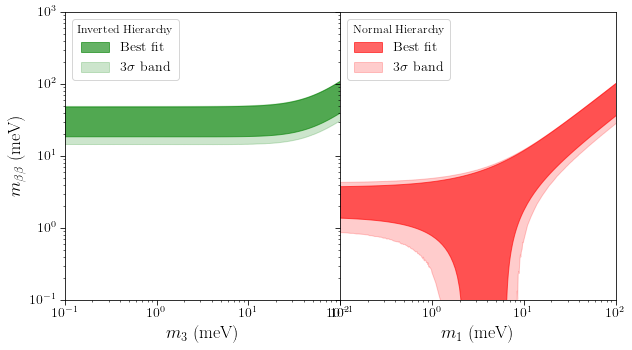

In [8]:
XaxisMin = .1
XaxisMax = 100
YaxisMin = .1
YaxisMax = 1000

f, (IH, NH) = plt.subplots(1, 2, sharey=True, figsize=(9,5))
massContour(IH, ml,mbbI, 'g',r'$m_{3}$ (meV)', r'$m_{\beta\beta}$ (meV)')
massContour(NH, ml,mbbN, 'r',r'$m_{1}$ (meV)')
f.subplots_adjust(wspace=0, left = 0.12, bottom=0.15, right=0.97, top=0.95)

bestfit = mpatches.Patch(color='g', alpha=0.6)
threeS = mpatches.Patch(color='g', alpha=0.2)
IH.legend([bestfit, threeS], ['Best fit', '3$\sigma$ band'],loc=2,title='Inverted Hierarchy', fontsize = 14)
bestfit = mpatches.Patch(color='r', alpha=0.6)
threeS = mpatches.Patch(color='r', alpha=0.2)
NH.legend([bestfit, threeS], ['Best fit', '3$\sigma$ band'],loc=2,title='Normal Hierarchy',fontsize = 14)

IH.set_xlim(XaxisMin,XaxisMax)
IH.set_ylim(YaxisMin,YaxisMax)

NH.set_xlim(XaxisMin,XaxisMax)
NH.set_ylim(YaxisMin,YaxisMax)

# plt.tight_layout()
## Uncomment the following line of you'd like to save the plot
# plt.savefig("./Lobster_twoPanels.pdf")

### Can also plot them on the same panel, and add stuff such as you experiment's limit and/or sensitivity, etc

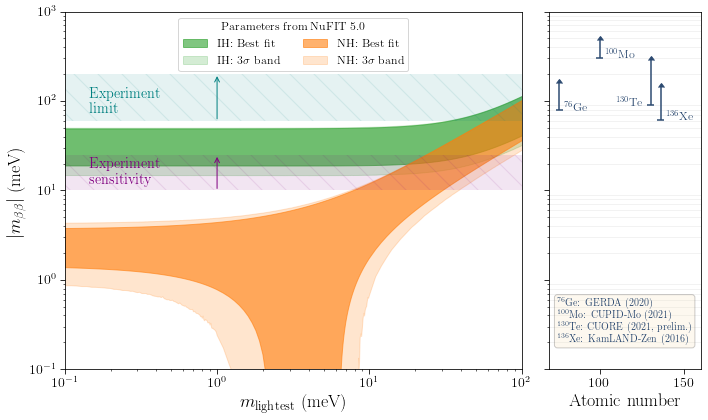

In [40]:
# Define some needed variables

axisMin = .1
axisMax = 1E3
XaxisMax = 100
arrowXscale = 1.2

#Define plot

f, (massCont, A) = plt.subplots(1, 2, sharey=True, figsize=(10,6),gridspec_kw={'width_ratios': [3, 1]})

#Plot mass contours and 3 sigma bands 
massContour(massCont, ml,mbbI, 'C2',r'$m_{l}$ (meV)', r'$m_{\beta\beta}$ (meV)')
massContour(massCont, ml,mbbN, 'C1',r'$m_{\text{lightest}}$ (meV)', r'$|m_{\beta\beta}|$ (meV)')

f.subplots_adjust(wspace=0, left = 0.12, bottom=0.15, right=0.97, top=0.95)
xMin = yMin = axisMin
xMax = XaxisMax
yMax = axisMax

# Add sensitivities and limits for a fictitious "Experiment"

addSensitivity(massCont, 60, 200, xMin, color = "teal", experiment_name="Experiment \n limit")
addSensitivity(massCont, 10, 25, xMin, experiment_name="Experiment \n sensitivity", color = "purple")

massCont.set_xlim(xMin, xMax)
massCont.set_xlim(xMin, xMax)

###
# Now plotting on the right panel
###

AddExperimentalLimits(A, A, xMin=70, xMax=160, isotopes=["Te", "Ge", "Xe", "Mo"])
A.grid(axis='y', alpha = 0.2, which="minor")
if yMin>0 and yMax >0:
    massCont.set_ylim(yMin, yMax)
else:
    massCont.set_ylim(xMin, xMax)

##
# Add legend
##
    
bestfitNH = mpatches.Patch(color="C1", alpha=0.6)
threeSNH = mpatches.Patch(color='C1', alpha=0.2)

bestfitIH = mpatches.Patch(color="C2", alpha=0.6)
threeSIH = mpatches.Patch(color='C2', alpha=0.2)

massCont.legend([bestfitIH, threeSIH, bestfitNH, threeSNH], ['IH: Best fit', 'IH: 3$\sigma$ band', 'NH: Best fit', 
                                                       'NH: 3$\sigma$ band'],title='Parameters from NuFIT 5.0', 
                                                      fontsize = 12, ncol = 2, loc = "upper center", fancybox = True)

####
# Add information about isotope imits #
###
 
isotope_Limit = "$^{76}$Ge: GERDA (2020) \n $^{100}$Mo: CUPID-Mo (2021) \n $^{130}$Te: CUORE (2021, prelim.) \n $^{136}$Xe: KamLAND-Zen (2016)"
props = dict(boxstyle='round', facecolor='wheat', alpha=0.2)
A.text(75, 2E-1, isotope_Limit, color = '#2B4970', fontsize=10, bbox = props)

    
plt.tight_layout()
# plt.savefig("./Lobster_example.pdf")